In [1]:
suppressPackageStartupMessages({
    library(dplyr)
    library(readr)
    library(tidyr)
})

[Analysis Data](https://www.proteinatlas.org/download/rna_immune_cell_monaco.tsv.zip)

In [2]:
data <- read_tsv("rna_immune_cell_monaco.tsv.zip") %>% as.data.frame()

Rows: 604860 Columns: 5
── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): Gene, Gene name, Immune cell
dbl (2): TPM, pTPM

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
head(data)

,Gene,Gene name,Immune cell,TPM,pTPM
,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,ENSG00000000003,TSPAN6,basophil,0.5,0.9
2,ENSG00000000003,TSPAN6,Central memory CD8 T-cell,1.1,1.8
3,ENSG00000000003,TSPAN6,classical monocyte,0.2,0.2
4,ENSG00000000003,TSPAN6,Effector memory CD8 T-cell,0.5,0.7
5,ENSG00000000003,TSPAN6,Exhausted memory B-cell,0.4,0.7
6,ENSG00000000003,TSPAN6,intermediate monocyte,0.1,0.2


In [4]:
protein_atlas <- c(
  "PDCD1",
  "TNFRSF4",
  "BTLA"
)

celltype <- c(
  "Central memory CD8 T-cell", "Effector memory CD8 T-cell", 
  "MAIT T-cell", "Memory CD4 T-cell TFH", "Memory CD4 T-cell Th1", 
  "Memory CD4 T-cell Th1/Th17", "Memory CD4 T-cell Th17", "Memory CD4 T-cell Th2", 
  "naive CD4 T-cell", "naive CD8 T-cell", "Non-Vd2 gdTCR", "T-reg",
  "Terminal effector memory CD4 T-cell", "Terminal effector memory CD8 T-cell"
)

In [6]:
# Filter and pivot the dataframe
filtered_df <- data %>%
  filter(`Gene name` %in% protein_atlas) %>%
  filter(`Immune cell` %in% celltype) %>%
  select(-c(Gene, pTPM)) %>% 
  pivot_wider(names_from = "Gene name", values_from = "TPM") %>%
 select(`Immune cell`, PDCD1, TNFRSF4, BTLA)


In [7]:
head(filtered_df)

Immune cell,PDCD1,TNFRSF4,BTLA
<chr>,<dbl>,<dbl>,<dbl>
Central memory CD8 T-cell,8.4,1.9,24.3
Effector memory CD8 T-cell,72.9,1.8,11.4
MAIT T-cell,11.6,1.0,8.8
Memory CD4 T-cell TFH,33.4,31.2,22.9
Memory CD4 T-cell Th1,25.7,13.0,27.3
Memory CD4 T-cell Th1/Th17,16.7,34.0,27.7


In [8]:
write.table(filtered_df, "result.csv", sep = ",", row.names = FALSE)

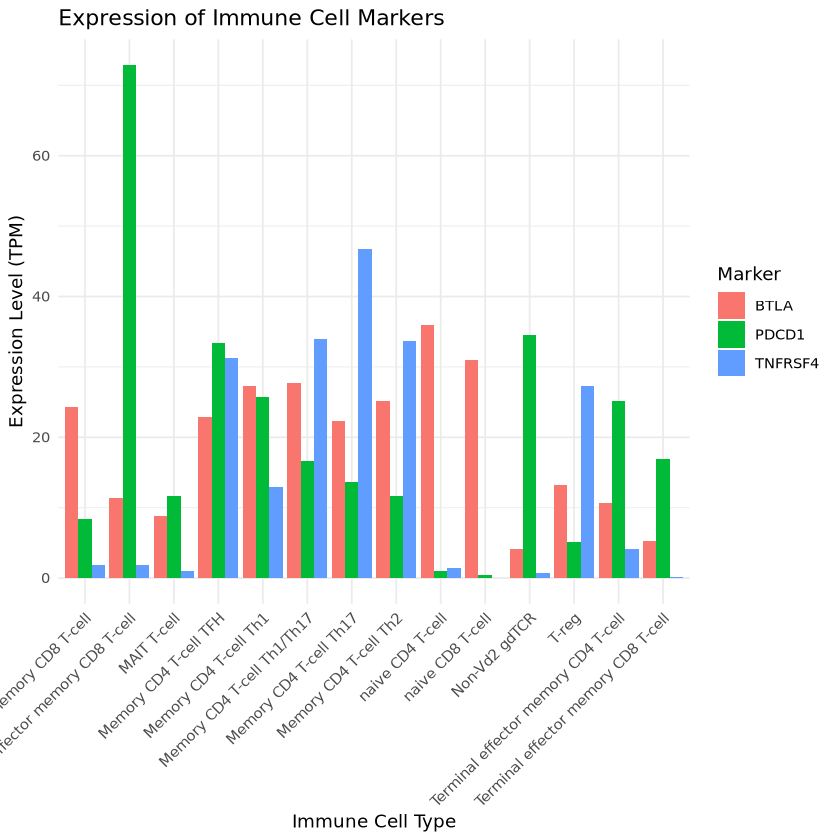

In [18]:
# Create the bar plot
data_long <- pivot_longer(filtered_df, cols = c(PDCD1, TNFRSF4, BTLA), 
                           names_to = "Marker", values_to = "Expression")

p <- ggplot(data_long, aes(x = `Immune cell`, y = Expression, fill = Marker)) +
  geom_bar(stat = "identity", position = "dodge") +
  theme_minimal() +
  labs(title = "Expression of Immune Cell Markers",
       x = "Immune Cell Type",
       y = "Expression Level (TPM)",
       fill = "Marker") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))
p

ggsave("t_cell_expression_plot.png", plot = p, width = 10, height = 6, dpi = 300)